In [1]:
from scipy import special
from scipy import stats
from scipy.optimize import brentq
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# "the default sans-serif font is Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 10})

In [2]:
# Prepare the original data
Data = pd.read_csv('OriginalHurricanData.csv')

In [4]:
Hval = np.array(Data['Number'])
Hfreq = np.array(Data['Frequency'])

In [5]:
# Solve the ML estimator for Negative binomial distribution
# Parameters obtain from the sample
Samplesum = 1838
N = 166
Mean = 11.07

In [10]:
# ML formula for r 
def mlr(r):
    # first digama sum part
    f1 = 0
    for i in range(len(Hval)):
        z = Hval[i] + r
        f1 += (special.digamma(z)*Hfreq[i])
    f1 = f1 - N*special.digamma(r) + N*np.log(r/(r+Mean))
    return f1 

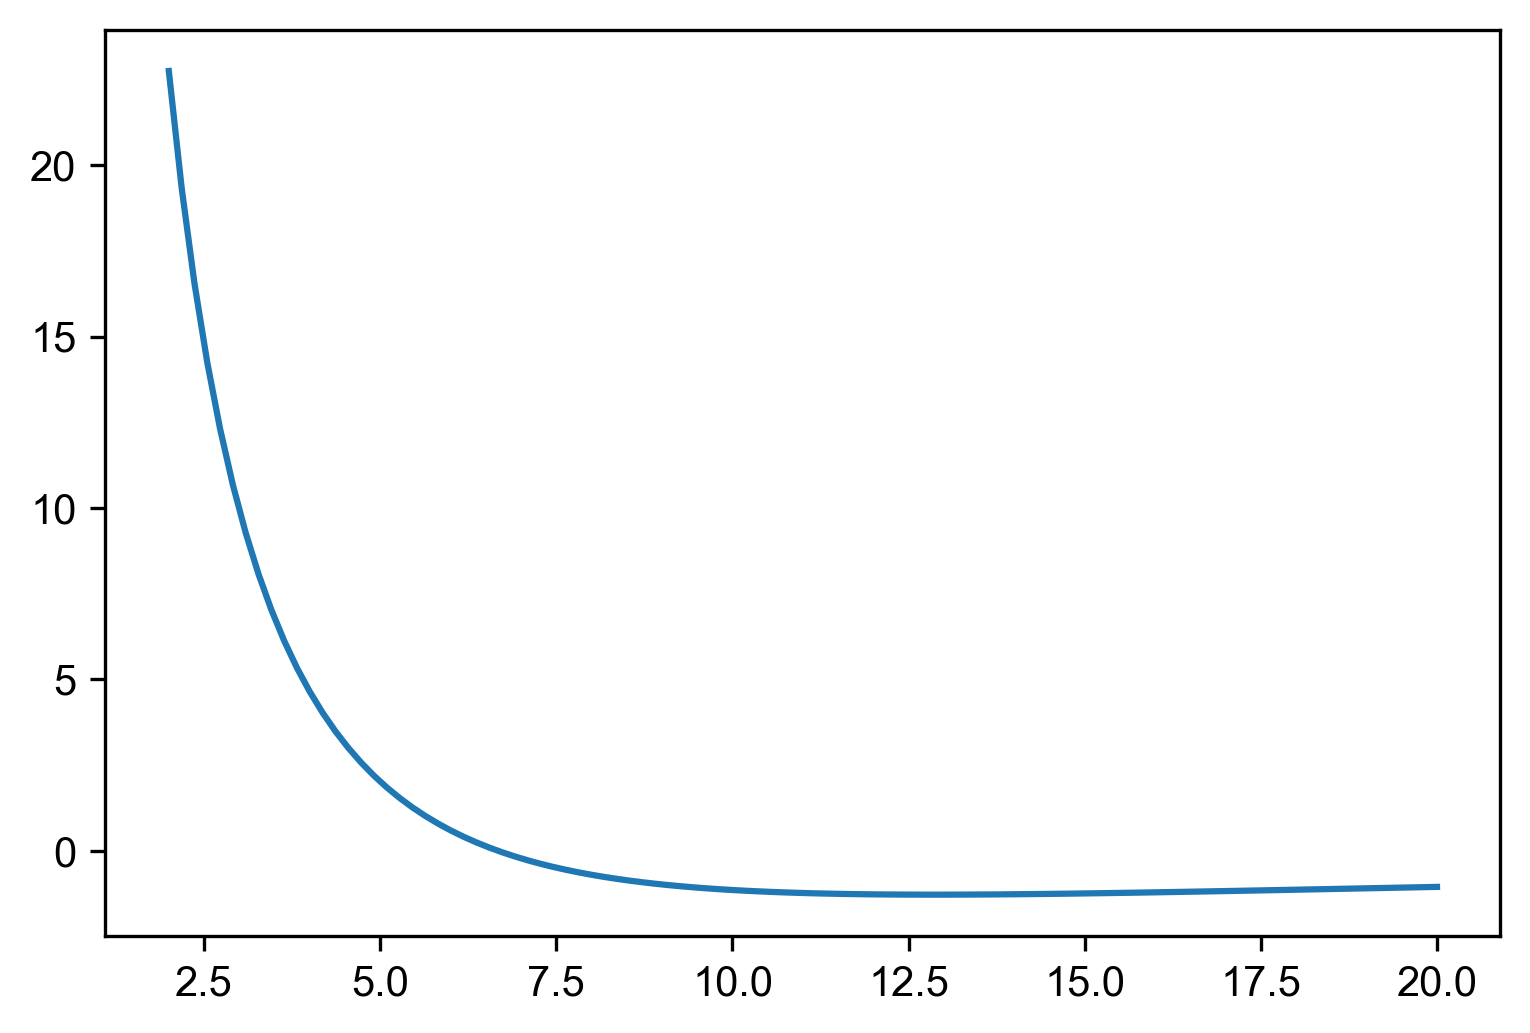

In [19]:
R = np.linspace(2, 20, 100)
plt.plot(R, mlr(R))
plt.rcParams['figure.figsize'] = (6, 4) 
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
plt.savefig(r"%s.jpg"%('MLR'), bbox_inches='tight')
plt.show()

In [12]:
# plt.axhline(color = 'k')
root, info = brentq(mlr, 2, 20, full_output=True)

In [13]:
root

6.6744360754445635

In [14]:
info

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: 6.6744360754445635

In [17]:
P = (166*root/(166*root+1838))
P

0.3760939546966574